# Table of Contents

### 1. Importing libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing the Olist data

## 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') # styling option

In [2]:
# Define path

path = r'C:\Users\radav\OneDrive\Documents\Career Foundry\Data Analytics\Immersion\Achievement 6 Advanced Analytics and Dashboard Design\Olist'

In [3]:
# Import Olist data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_merged.csv'), index_col=[0])

In [4]:
# Check dataset

df.head()

,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,1,credit_card,1,18.12,8.0,2.0,6.0,7.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,3,voucher,1,2.00,8.0,2.0,6.0,7.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,2,voucher,1,18.59,8.0,2.0,6.0,7.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4.0,1,boleto,1,141.46,12.0,0.0,12.0,5.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,5.0,1,credit_card,3,179.12,9.0,0.0,9.0,17.0


In [5]:
df.shape

(104477, 18)

## 2. Subsetting, wrangling, and cleaning time-series data

In [6]:
# Subset columns for time-series analysis of monthly Olist sales revenue from orders

df = df[['order_approved_at','payment_value']]

In [7]:
# Re-check output

df.head()

,order_approved_at,payment_value
0,2017-10-02 11:07:15,18.12
1,2017-10-02 11:07:15,2.00
2,2017-10-02 11:07:15,18.59
3,2018-07-26 03:24:27,141.46
4,2018-08-08 08:55:23,179.12


In [8]:
df.shape

(104477, 2)

In [9]:
df.dtypes

order_approved_at     object
payment_value        float64
dtype: object

In [10]:
# Convert the date columns to date format

columns = ['order_approved_at']
df[columns] = df[columns].apply(pd.to_datetime)

In [11]:
# Re-check data types

df.dtypes

order_approved_at    datetime64[ns]
payment_value               float64
dtype: object

In [12]:
df = df.groupby([df['order_approved_at'].dt.strftime('%Y-%m')])['payment_value'].sum().reset_index()

In [13]:
df.head(25)

,order_approved_at,payment_value
0,2016-10,58561.56
1,2016-12,19.62
2,2017-01,132807.60
3,2017-02,293254.16
4,2017-03,448016.96
5,2017-04,414502.50
6,2017-05,597444.98
7,2017-06,519453.78
8,2017-07,589255.31
9,2017-08,678364.17


In [14]:
# Re-convert the grouped date columns to date format

columns = ['order_approved_at']
df[columns] = df[columns].apply(pd.to_datetime)

In [15]:
df.head()

,order_approved_at,payment_value
0,2016-10-01,58561.56
1,2016-12-01,19.62
2,2017-01-01,132807.60
3,2017-02-01,293254.16
4,2017-03-01,448016.96


In [16]:
# Exclude data before 2017 and 9/18 month since this appears to be incomplete order data

df_sub = df.loc[(df['order_approved_at'] > '2016-12') & (df['order_approved_at'] < '2018-09')].reset_index(drop=True)

In [17]:
# Check output of new dataframe

df_sub.head(25)

,order_approved_at,payment_value
0,2017-01-01,132807.60
1,2017-02-01,293254.16
2,2017-03-01,448016.96
3,2017-04-01,414502.50
4,2017-05-01,597444.98
5,2017-06-01,519453.78
6,2017-07-01,589255.31
7,2017-08-01,678364.17
8,2017-09-01,720722.84
9,2017-10-01,787609.66


In [18]:
# Since decomposition requires at least 24 observations, I am manually adding 4 months of data assuming last 6 months average sales.
# This is for learning purposes only and is not part of the data released by Olist. 
# Payment value inputs calculated in Excel from Olist data set.

dict = ({'order_approved_at': ['2018/09/01', '2018/10/01', '2018/11/01', '2018/12/01'],
        'payment_value': [1101040.25, 1088715.29, 1080130.66, 1063344.87]})

In [19]:
df2 = pd.DataFrame(dict)

In [20]:
df2.head()

,order_approved_at,payment_value
0,2018/09/01,1101040.25
1,2018/10/01,1088715.29
2,2018/11/01,1080130.66
3,2018/12/01,1063344.87


In [21]:
# Convert the date columns to date format

columns = ['order_approved_at']
df2[columns] = df2[columns].apply(pd.to_datetime)

In [22]:
df2.head()

,order_approved_at,payment_value
0,2018-09-01,1101040.25
1,2018-10-01,1088715.29
2,2018-11-01,1080130.66
3,2018-12-01,1063344.87


In [23]:
print('Dataframes:')
display(df_sub)
display(df2)

Dataframes:


,order_approved_at,payment_value
0,2017-01-01,132807.60
1,2017-02-01,293254.16
2,2017-03-01,448016.96
3,2017-04-01,414502.50
4,2017-05-01,597444.98
5,2017-06-01,519453.78
6,2017-07-01,589255.31
7,2017-08-01,678364.17
8,2017-09-01,720722.84
9,2017-10-01,787609.66


,order_approved_at,payment_value
0,2018-09-01,1101040.25
1,2018-10-01,1088715.29
2,2018-11-01,1080130.66
3,2018-12-01,1063344.87


In [24]:
df_merged = pd.concat([df_sub, df2], axis=0).reset_index(drop=True)
df_merged.head(24)

,order_approved_at,payment_value
0,2017-01-01,132807.60
1,2017-02-01,293254.16
2,2017-03-01,448016.96
3,2017-04-01,414502.50
4,2017-05-01,597444.98
5,2017-06-01,519453.78
6,2017-07-01,589255.31
7,2017-08-01,678364.17
8,2017-09-01,720722.84
9,2017-10-01,787609.66


In [25]:
# Set the "Date" column as the index

from datetime import datetime

df_merged['datetime'] = pd.to_datetime(df_merged['order_approved_at']) # Create a datetime column
df_merged = df_merged.set_index('datetime') # Set the datetime as the index of the dataframe
df_merged.drop(['order_approved_at'], axis=1, inplace=True) # Drop the 'order_approved_at' column
df_merged.head()

,payment_value
datetime,
2017-01-01,132807.60
2017-02-01,293254.16
2017-03-01,448016.96
2017-04-01,414502.50
2017-05-01,597444.98


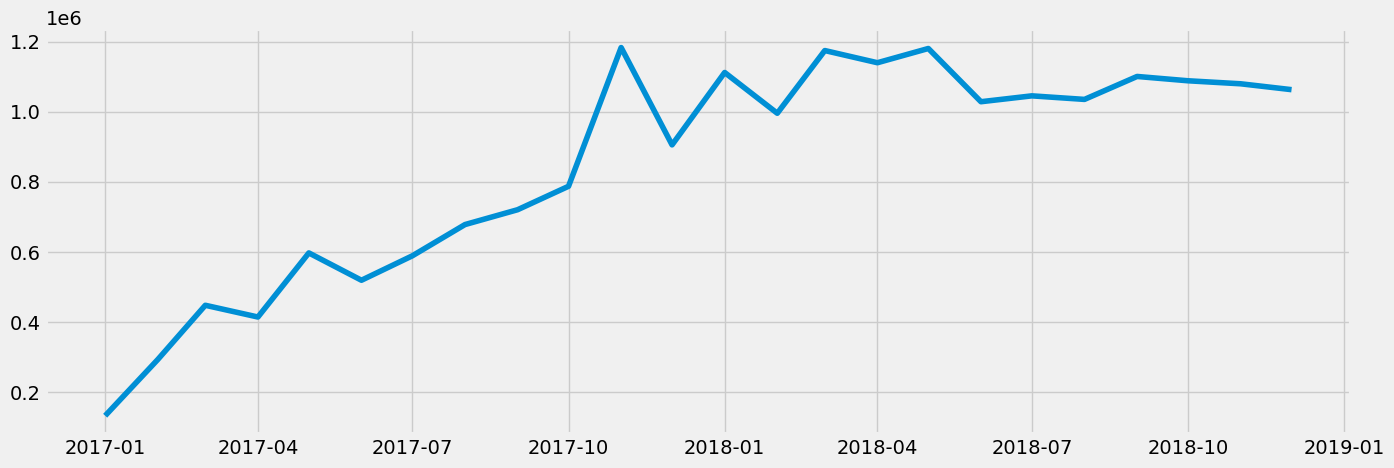

In [26]:
# Plot the data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_merged)

In [ ]:
# Export time series

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Act_vs_Carrier_Delivery_Days.png'))

## 3. Time-series analysis: decomposition

In [27]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_merged, model='additive')

In [28]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

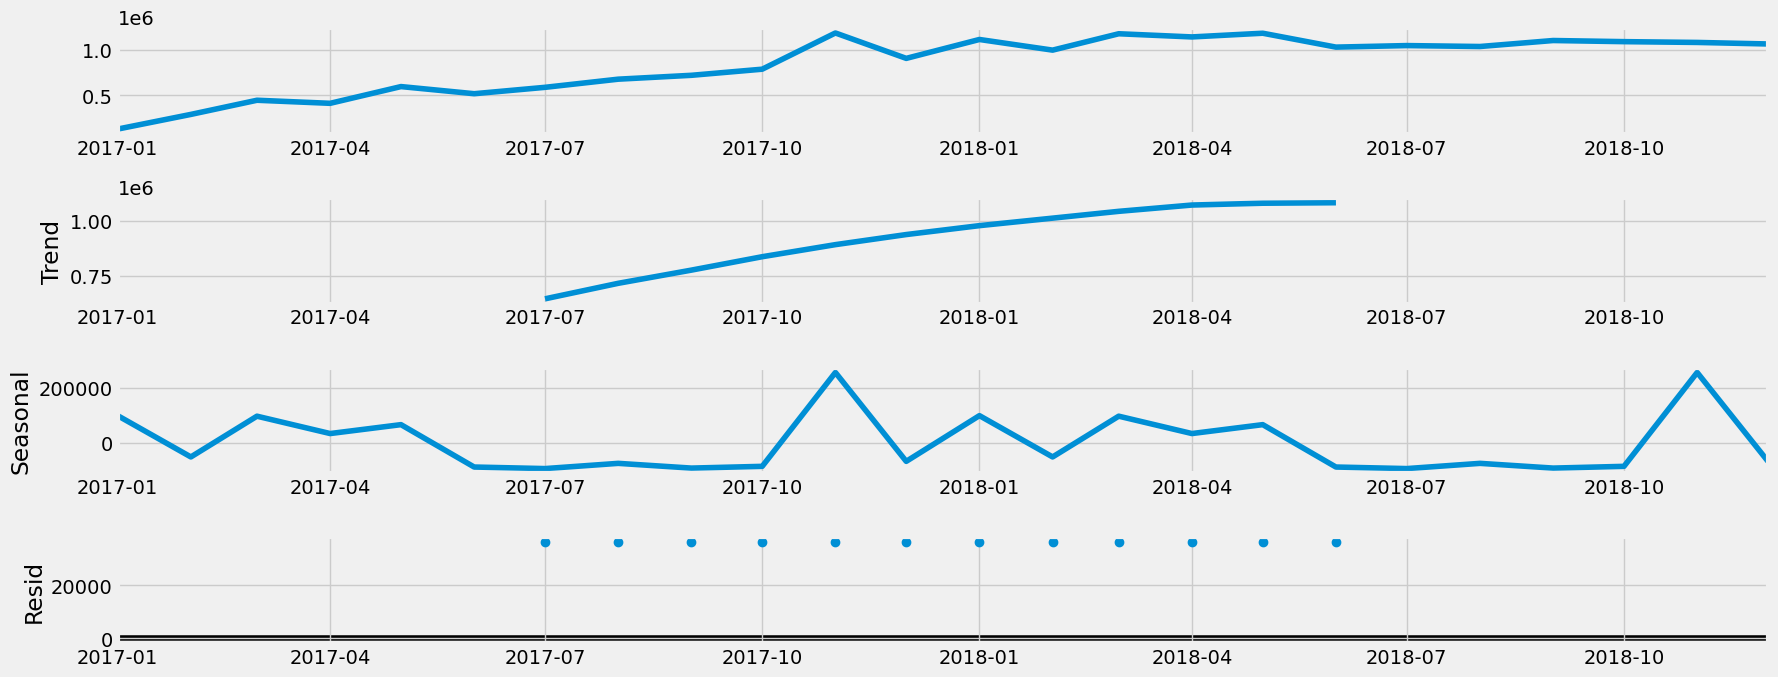

In [29]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Observations on the components plot:
   1. Trend: There is a dominant upward trend in the data that is evident between July 2017 and June 2018.
   2. Seasonality: There is some seasonality as shown by the consistent pattern in each year, however, there is very limited history of two years to be able to rely heavily on the seasonality measure.
   3. Residual: There is some residual unexplained noise reflected by the dots above the straight line on the chart.
   4. Overall: This is very likely to be a non-stationary data set because of the long-term upward trend and some seasonality.

## 4. Testing for stationarity

In [30]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_merged['payment_value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.004492
p-value                         0.284607
Number of Lags Used             7.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


#### The Test Statistic of -2.0 is greater than the Critical Value at the 5% significance level of -3.1, therefore I can't reject the null hypothesis that there is a unit root in the data set. I have to assume there is still non-stationarity in the data.

## 5. Stationarizing the Olist data

In [31]:
# Differencing the data set

data_diff = df_merged - df_merged.shift(1) # The df.shift(1) function turns the observation to t-1

In [32]:
data_diff.dropna(inplace = True) # Removing the missing values that came about as a result of the differencing. 

In [33]:
# Check differenced output

data_diff.head()

,payment_value
datetime,
2017-02-01,160446.56
2017-03-01,154762.80
2017-04-01,-33514.46
2017-05-01,182942.48
2017-06-01,-77991.20


In [34]:
data_diff.columns

Index(['payment_value'], dtype='object')

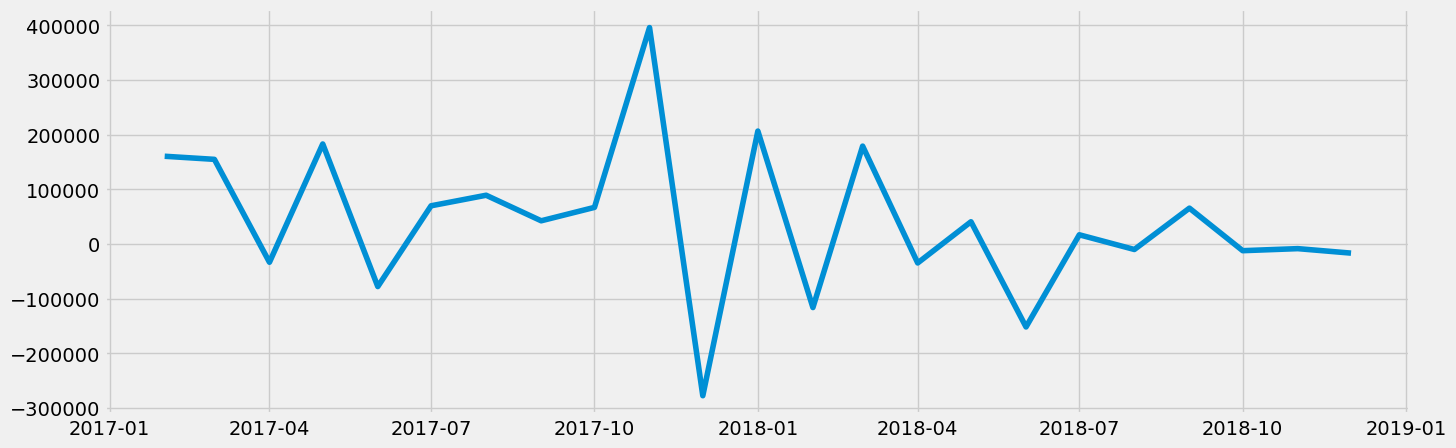

In [35]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [36]:
# Re-run Dickey-Fuller test

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.113944e+01
p-value                        3.134993e-20
Number of Lags Used            9.000000e+00
Number of Observations Used    1.300000e+01
Critical Value (1%)           -4.068854e+00
Critical Value (5%)           -3.127149e+00
Critical Value (10%)          -2.701730e+00
dtype: float64


#### There is still non-stationarity in the data as the Test Statistic is till greater than the Critical Value at the 5% significance level.

In [37]:
# Perform another round of differencing

data_diff2 = data_diff - data_diff.shift(1)

In [38]:
data_diff2.dropna(inplace = True)

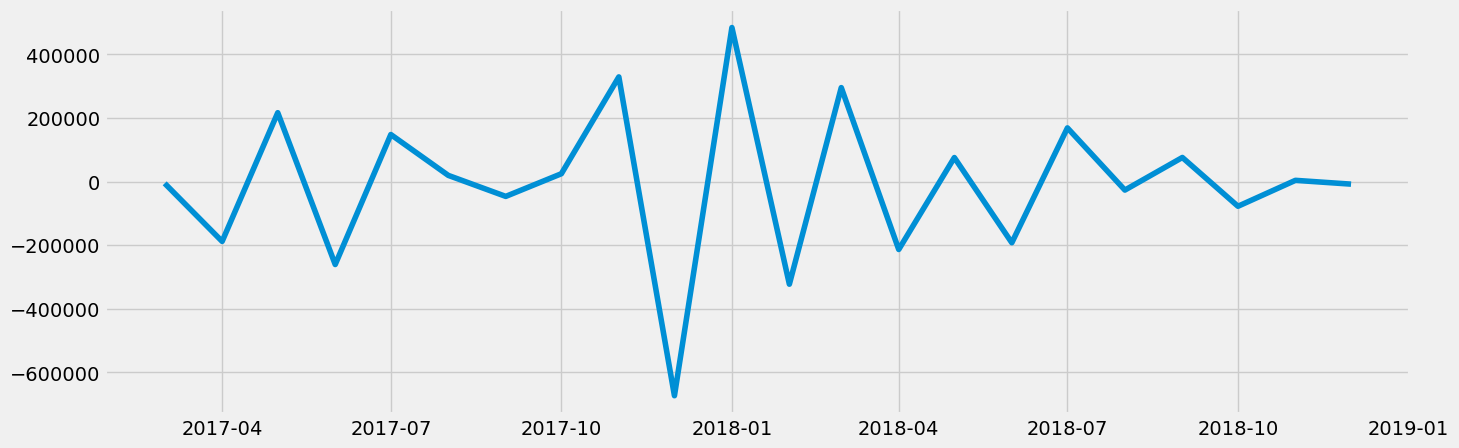

In [39]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [40]:
# Re-run Dickey-Fuller test

dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.927794
p-value                         0.778682
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


#### There is still non-stationarity in the data as the Test Statistic remains greater than the Critical Value at the 5% significance level. SInce the Test statistic does not appear to be getting closer to the Test Statistic, I would have to adopt a different methodology to stationarizing the data.

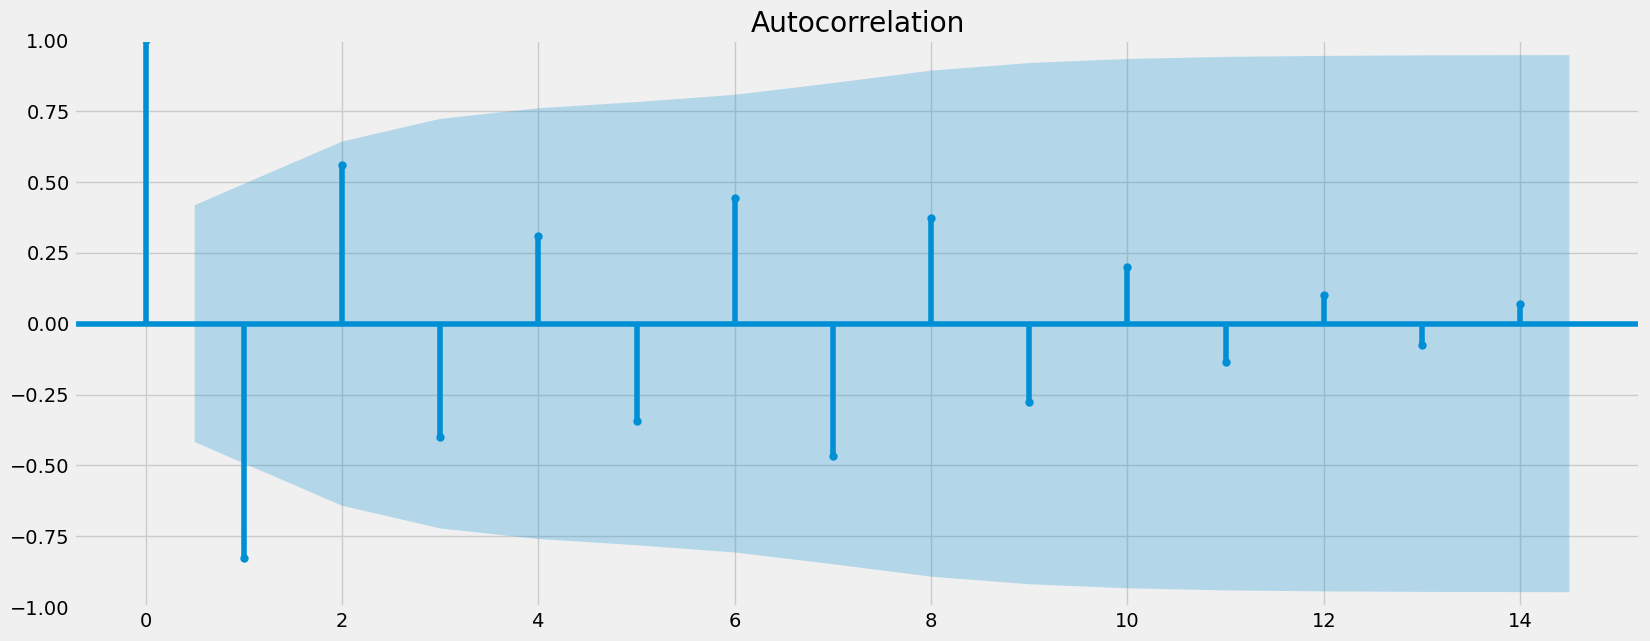

In [41]:
# Check the data's autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the autocorrelation and partial correlation plots

plot_acf(data_diff2)
plt.show()

#### There is limited evidence of autocorrelation because there is only one vertical line above the blue-shaded confidence interval. However, this is likely a function of limited observations and the results of the Dickey-Fuller test suggest that the data is still non-stationary and therefore not ready to be used for forecasting purposes. Ultimately, the time period covered by the data set is too short to be reliably used for forecasting even if it can be very useful for other data analyses.